# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,recall_score,precision_score
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder , StandardScaler
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

# 2. Reading Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


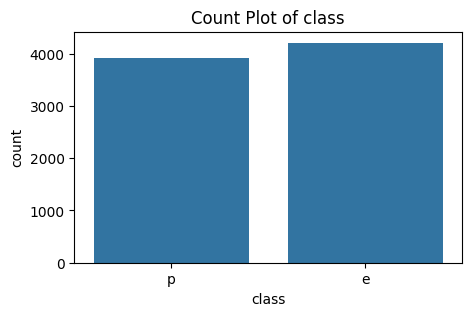

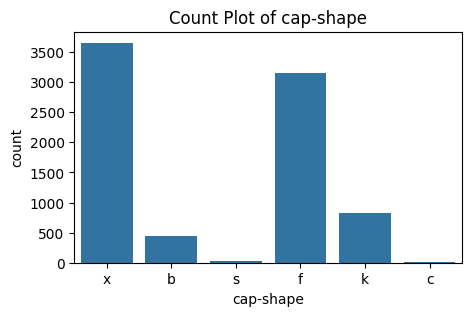

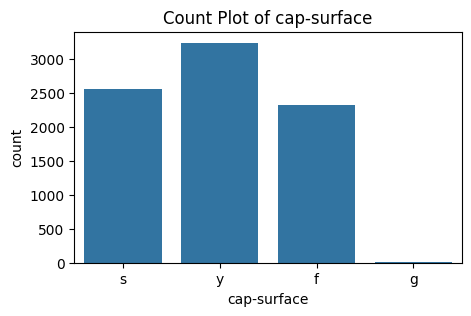

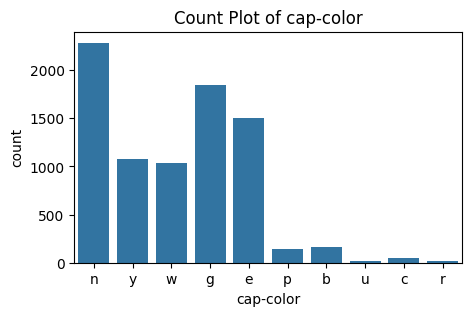

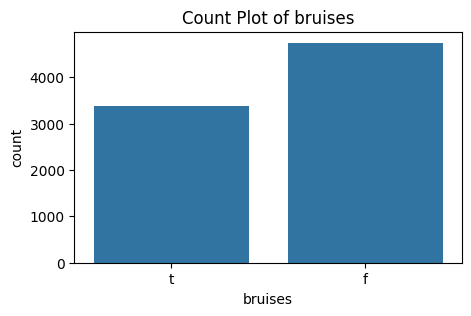

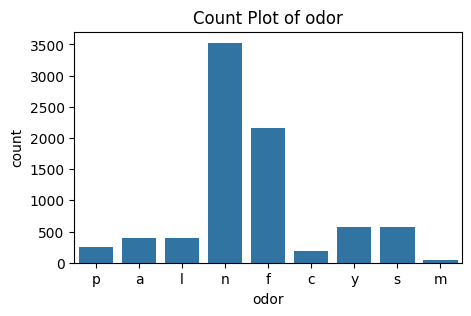

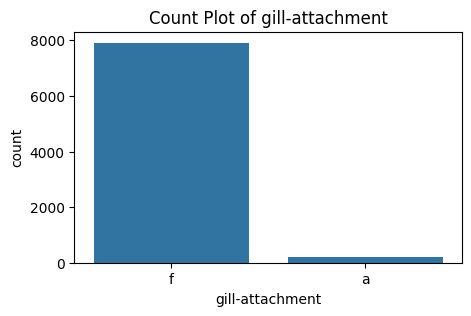

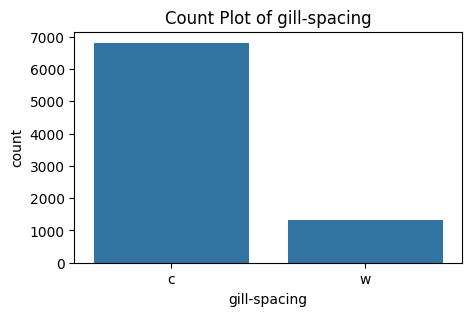

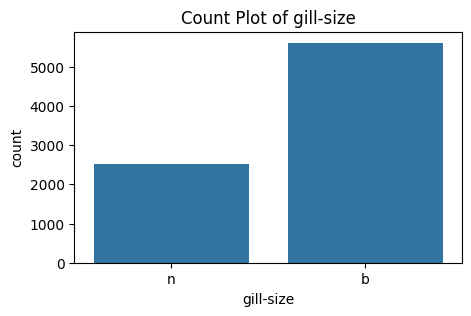

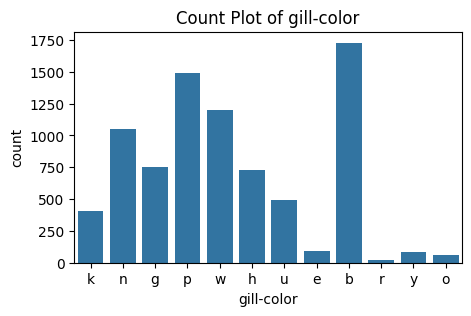

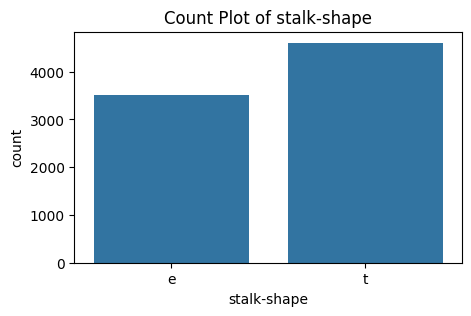

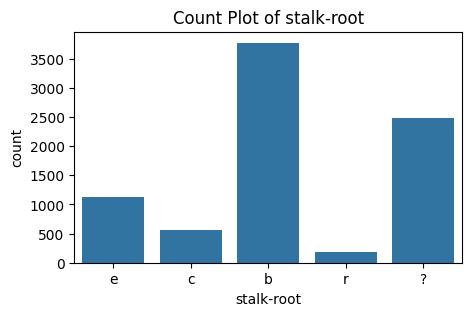

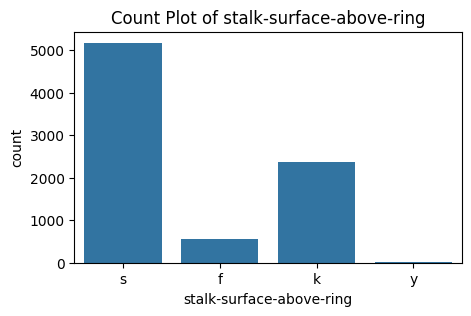

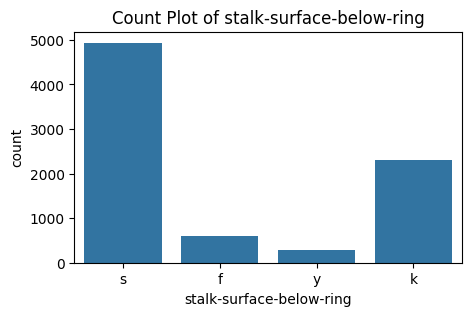

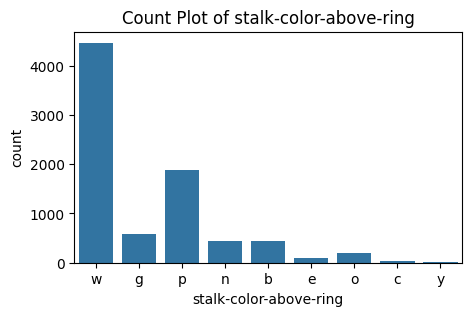

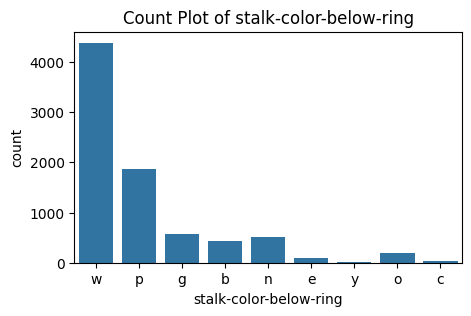

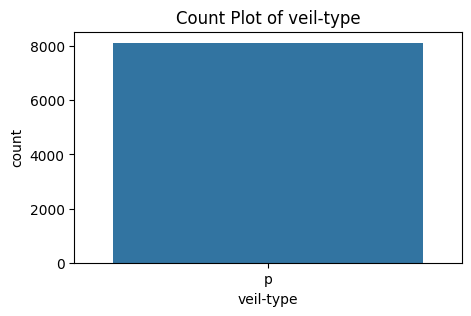

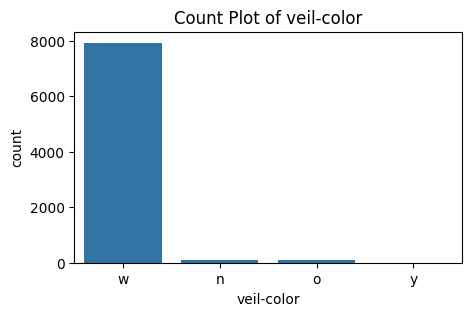

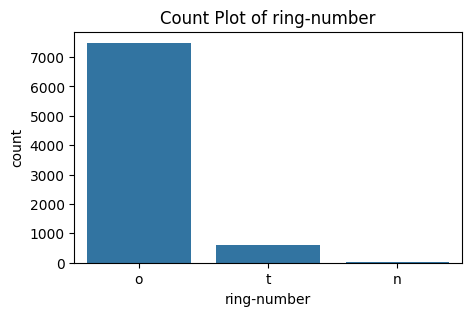

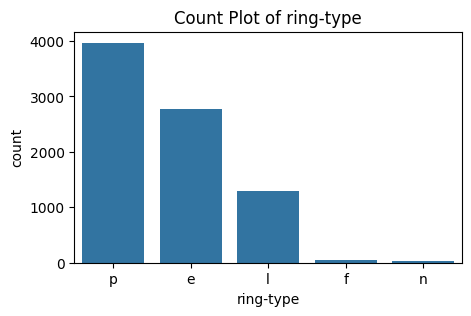

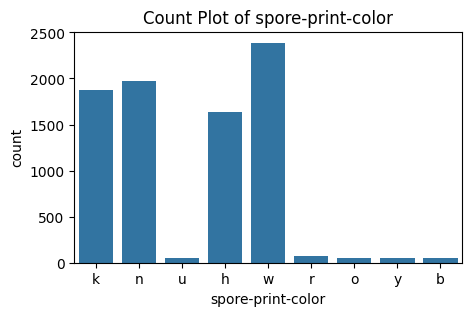

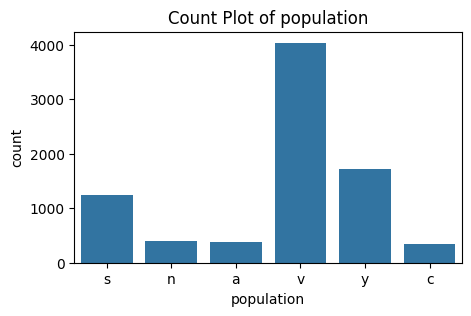

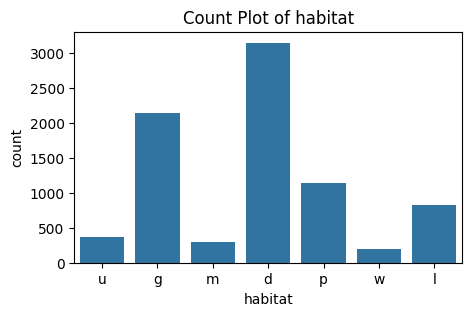

In [7]:
for column in df.columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(x=column, data=df)
        plt.title(f'Count Plot of {column}')
        plt.show()

# Decesion Tree Model

# 3. Data Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
x = df.drop(['class'] , axis = 1)
y = df['class']

# 3.1 PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca_fit=pca.fit_transform(x)

In [11]:
pca.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841])

In [12]:
sum(pca.explained_variance_ratio_)

0.8501681635086217

# 3.2 Split Data

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

# 4. Decesion Tree Model

In [14]:
from sklearn.model_selection import GridSearchCV
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the grid of parameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10]
}

# Create the grid search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7}


In [15]:
dt = DecisionTreeClassifier(random_state = 0 , criterion = 'entropy', max_depth = 7)
dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [16]:
dt.score(x_train , y_train)

1.0

In [17]:
y_pred1 = dt.predict(x_test)

In [18]:
accuracy_DT=accuracy_score(y_test , y_pred1)*100
print(accuracy_DT)

100.0


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

In [20]:
print("Classification Metrics For Test:")
print(f"Accuracy: {accuracy_DT:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Metrics For Test:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


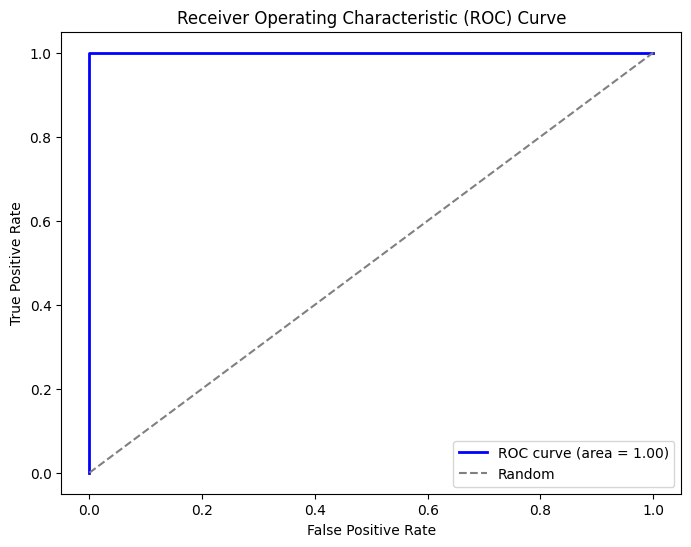

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Make predictions on the test set
y_pred_proba = dt.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 5. Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest regressor
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(x_train, y_train)
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
rf = RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators= 100)

In [24]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

1.0

In [25]:
y_pred2 = rf.predict(x_test)
rf.score(x_test , y_test)
accuracy_RF=accuracy_score(y_test , y_pred2)*100
print(accuracy_RF)

100.0


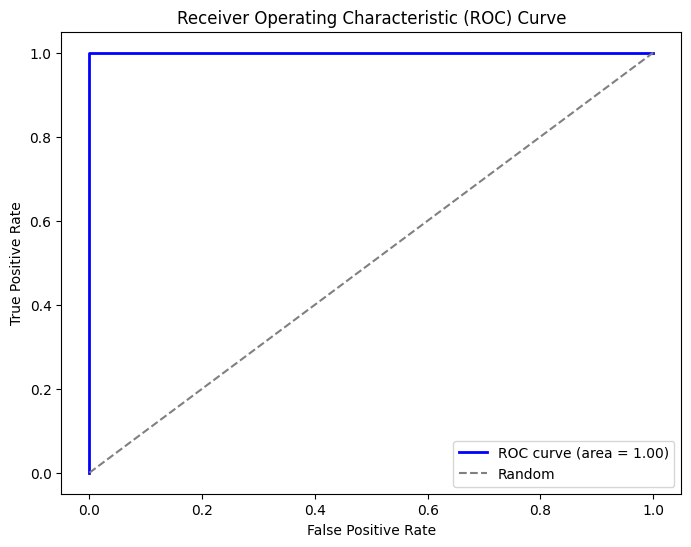

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Make predictions on the test set
y_pred_proba = rf.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SVM Model

# splitting data to Train / Test 

In [27]:
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(x, y, test_size = 0.25, random_state = 4)


# Encoding 

In [28]:
enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

In [29]:
X_train_transf = enc_x.fit_transform(X_trainsvm)
X_test_transf = enc_x.transform(X_testsvm)

y_train_transf = enc_y.fit_transform(y_trainsvm)
y_test_transf = enc_y.transform(y_testsvm)

# Feature Scaling 

In [30]:
cols = X_trainsvm.columns
sc = StandardScaler()
X_trainsvm = sc.fit_transform(X_train_transf)
X_testsvm = sc.transform(X_test_transf)

X_trainsvm = pd.DataFrame(X_train_transf,columns=cols)
X_testsvm = pd.DataFrame(X_test_transf,columns=cols)

# Modeling 

In [32]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_trainsvm, y_train_transf)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_transf, y_test_transf)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Accuracy on test set: 1.0


C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
Classifier= SVC(kernel='poly' , C=0.1, gamma= 1 )
Classifier.fit(X_train_transf ,y_train_transf ) 
Classifier.score(X_train_transf, y_train_transf)

1.0

In [32]:
y_predict = Classifier.predict(X_test_transf)
accuracy_svm = accuracy_score(y_test_transf, y_predict)*100
accuracy_svm

100.0

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test_transf, y_predict)
recall = recall_score(y_test_transf, y_predict)
f1 = f1_score(y_test_transf, y_predict)

In [34]:
print("Classification Metrics For Test:")
print(f"Accuracy: {accuracy_svm:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Metrics For Test:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# 6. Accuracy And Some Plots

In [35]:
final=pd.DataFrame({'Models':['DT','RF','SVM'],
             'ACC':[accuracy_DT,
                   accuracy_RF,
                    accuracy_svm]}
)

In [36]:
final

,Models,ACC
0,DT,100.0
1,RF,100.0
2,SVM,100.0


<Axes: xlabel='Models', ylabel='ACC'>

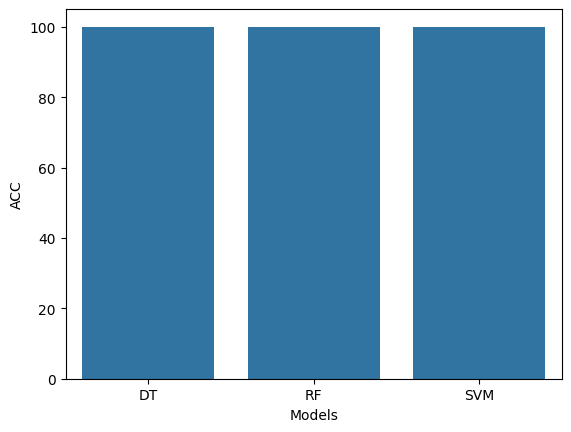

In [37]:
sns.barplot(x=final['Models'], y=final['ACC'])


# Decesion Tree Confusion matrix

In [38]:
con_matrix = confusion_matrix(y_test,y_pred1)
print (con_matrix)

[[843   0]
 [  0 782]]


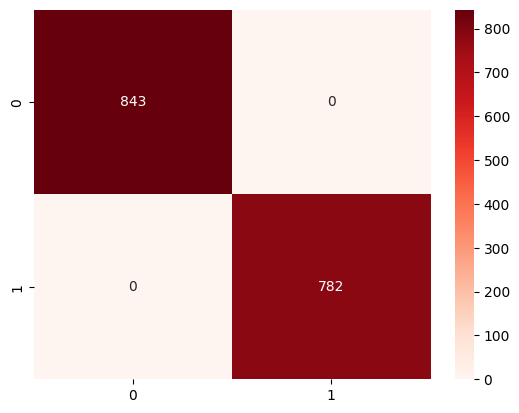

In [39]:
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds')

In [40]:
con_matrix = confusion_matrix(y_test,y_pred2)
print (con_matrix)

[[843   0]
 [  0 782]]


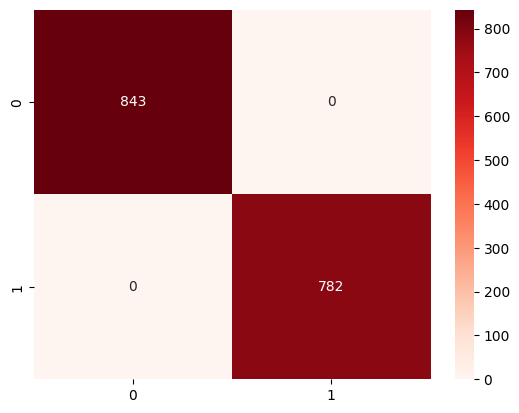

In [41]:
ax = sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds')

# SVM Confusion Matrix

In [42]:
#print(classification_report(y_test_transf , y_predict))
cm2 = confusion_matrix(y_test_transf, y_predict)
print(cm2)

[[1076    0]
 [   0  955]]


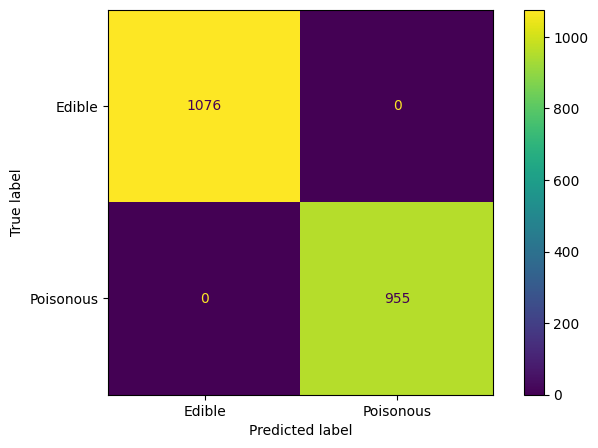

In [43]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_predict),
    display_labels=["Edible", "Poisonous"],
)

cmp.plot(ax=ax);

In [44]:
print(classification_report(y_test_transf, y_predict, target_names = ["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1076
   Poisonous       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


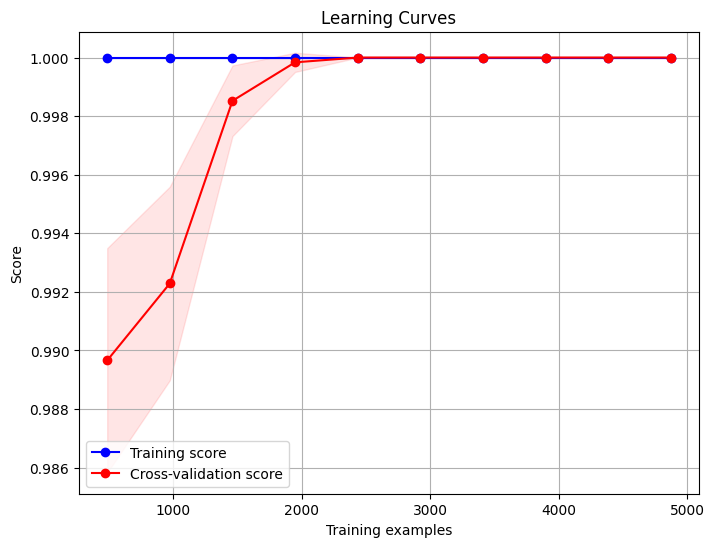

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.svm import SVC

cv_scores = cross_val_score(Classifier, X_train_transf, y_train_transf, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Plot learning curves
train_sizes, train_scores, val_scores = learning_curve(
    Classifier, X_train_transf, y_train_transf, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid(True)
plt.show()

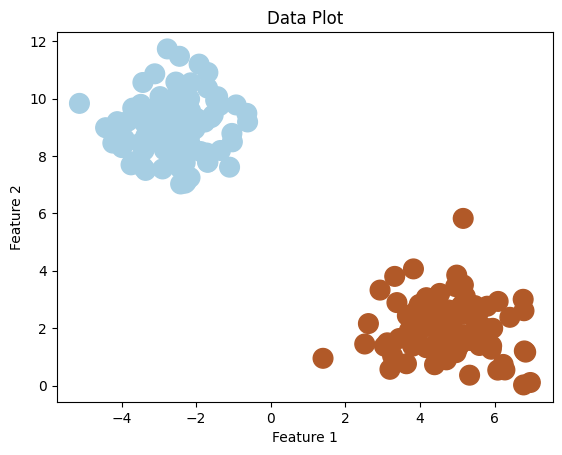

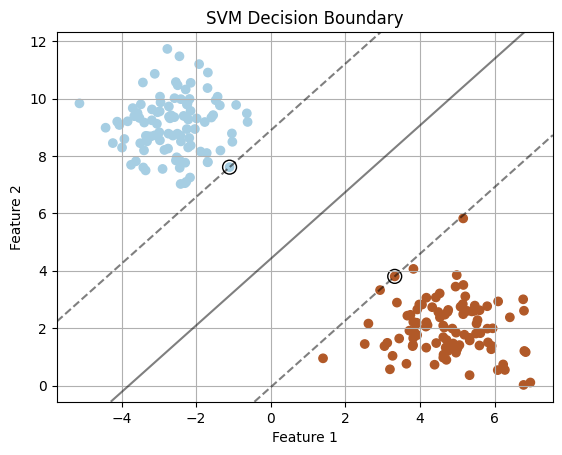

In [46]:
# Graphs 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

def plotData(X, y, marker_size):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=marker_size)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Plot')
    plt.show()

def plot_svc(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.grid(True)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 60)
    yy = np.linspace(ylim[0], ylim[1], 60)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

# Generate sample data
X_train_vs, y_train_vs = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.0 , n_features=2)

# Plot the data
plotData(X_train_vs, y_train_vs, 200)

# Train an SVM model
Classifier = SVC(kernel='linear', C=1.0)
Classifier.fit(X_train_vs, y_train_vs.ravel())

# Plot the SVM decision boundary
plot_svc(Classifier, X_train_vs, y_train_vs)

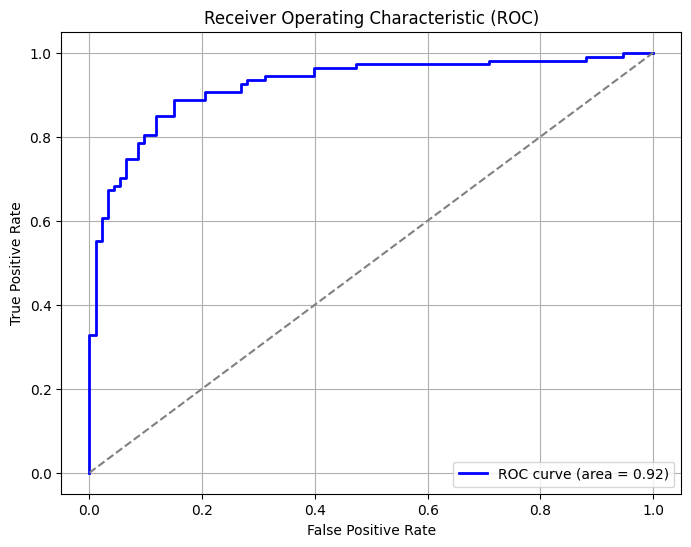

(8124,)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration
X, yyyy = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, yyyy, test_size=0.2, random_state=42)

# Train SVM model
svm_model = svm.SVC(probability=True)
svm_model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
y.shape

# 6. Save Model

In [48]:
print(y.shape)

(8124,)


In [50]:
dt_model=DecisionTreeClassifier(random_state = 0 , criterion = 'entropy', max_depth = 7)
dt_model.fit(pca_fit,y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [51]:
sv_model=SVC(kernel='poly' , C=0.1, gamma= 1 )
sv_model.fit(X_train_transf, y_train_transf)

SVC(C=0.1, gamma=1, kernel='poly')

In [52]:
joblib.dump(dt_model,"Mushroom Predection DT")


['Mushroom Predection DT']

In [53]:
joblib.dump(sv_model,"Mushroom Predection SVM")

['Mushroom Predection SVM']

In [54]:
y_test_transf[0]

0

# GUI

In [55]:
from tkinter import *
import joblib

def show_entry_fields():
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) == 31:
            widget.grid_forget()
    
    inputs = [int(entry_field.get()) for entry_field in entry_fields]
    if model_choice.get=="Decision Trees":
        model = joblib.load('Mushroom Predection DT')
        result = model.predict(pca.transform([inputs]))
    else:
        model = joblib.load('Mushroom Predection SVM')
        result = model.predict([inputs])

    if result[0] == 0:
        Label(master, text='edible '+model_choice.get()).grid(row=31)
    else:
        Label(master, text='poisonous '+model_choice.get()).grid(row=31)

def set_model_to_DT():
    global model_choice
    model_choice.set("Decision Trees")

def set_model_to_SVM():
    global model_choice
    model_choice.set("SVM")

master = Tk()
master.title("Mushroom Classification")

Label(master, text="Mushroom Classification Using Decision Trees", bg="black", fg="white").grid(row=0, columnspan=2)

model_choice = StringVar(master)
model_choice.set("Decision Trees")

Button(master, text='Decision Trees', command=set_model_to_DT).grid(row=1, column=0)
Button(master, text='SVM', command=set_model_to_SVM).grid(row=1, column=1)

# Labels for entry fields
labels = [
    "cap-shape: bell=0,conical=1,flat=2, knobbed=3,sunken=4,convex=5",
    "cap-surface: fibrous=0,grooves=1,smooth=2,scaly=3",
    "cap-color: buff=0,cinnamon=1,red=2,gray=3,brown=4,pink=5,purple=6,white=7,yellow=8,green=9",
    "bruises: no=0,bruises=1",
    "odor: almond=0,creosote=1,foul=2,anise=3,musty=4,none=5,pungent=6,spicy=7,fishy=8",
    "gill-attachment: attached=0,descending=1,free=2,notched=3",
    "gill-spacing: close=0,distant=1,crowded=2",
    "gill-size: broad=0,narrow=1",
    "gill-color: buff=0,red=1,gray=2,chocolate=3,black=4,brown=5,orange=6,pink=7,green=8,purple=9,white=10,yellow=11",
    "stalk-shape: enlarging=0,tapering=1",
    "stalk-root: bulbous=0,club=1,equal=2,rooted=3,rhizomorphs=4,cup=5,missing=6",
    "stalk-surface-above-ring: fibrous=0,silky=1,smooth=2,scaly=3",
    "stalk-surface-below-ring: fibrous=0,silky=1,smooth=2,scaly=3",
    "stalk-color-above-ring: buff=0,cinnamon=1,red=2,gray=3,brown=4,orange=5,pink=6,white=7,yellow=8",
    "stalk-color-below-ring: buff=0,cinnamon=1,red=2,gray=3,brown=4,orange=5,pink=6,white=7,yellow=8",
    "veil-type: partial=0,universal=1",
    "veil-color: brown=0,orange=1,white=2,yellow=3",
    "ring-number: none=0,one=1,two=2",
    "ring-type: cobwebby=0,evanescent=1,flaring=2,large=3,none=4,pendant=5,sheathing=6,zone=7",
    "spore-print-color: buff=0,chocolate=1,black=2,brown=3,orange=4,green=5,purple=6,white=7,yellow=8",
    "population: abundant=0,clustered=1,numerous=2,scattered=3,several=4,solitary=5",
    "habitat: woods=0,grasses=1,leaves=2,meadows=3,paths=4,urban=5,waste=6"
]

entry_fields = []
for i, label_text in enumerate(labels, start=2):
    Label(master, text=label_text).grid(row=i, column=0)
    entry_text = label_text.split(":")[1]
    options = entry_text.split(",")
    entry_field = StringVar(master)
    entry_field.set(options[0].split("=")[1])
    entry_fields.append(entry_field)
    OptionMenu(master, entry_field, *[option.split("=")[1] for option in options]).grid(row=i, column=1)

Button(master, text='predict', command=show_entry_fields).grid(row=len(labels)+2, columnspan=2)

mainloop()
